In [41]:
import PyCC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_errors(thetas,r,n,p,repeats = 2):
    outs = np.zeros((len(thetas),6*repeats),dtype=float)
    for repeat in range(repeats):
        for idx,theta in enumerate(thetas):
            distribution = PyCC.Distributions.Uniform(r=r,n=n,p=p)
            dist = r/np.tan(theta/2)
            pos = pd.DataFrame(np.array([[dist,0,0],[-dist,0,0],[0,dist,0],[0,-dist,0],[0,0,dist],[0,0,-dist]]),columns=["x","y","z"])
            direct,stats = PyCC.evaluate(df=distribution,evaluate_at=pos,save=False,algo="directsum")
            direct = direct.loc[:,"phi"].to_numpy()
            tree,stats = PyCC.evaluate(df=distribution,evaluate_at=pos,save=False,algo="treecode",theta=1)
            tree = tree.loc[:,"phi"].to_numpy()
            frac = np.abs(direct-tree)/np.abs(tree)
            offset = repeat * 6
            for i in range(6):
                outs[idx][i+offset] = frac[i]
    return outs

thetas = [1,2/3,1/2]
r = 10
p = 100
ns = [2,8,32,128,512,2048,8192,32768]
colors = ["red","green","blue"]
means = np.zeros((len(ns),len(thetas)),dtype=float)
medians = np.zeros((len(ns),len(thetas)),dtype=float)
for idx,n in enumerate(ns):
    print(n)
    out = get_errors(thetas=thetas,r=r,n=n,p=p,repeats=10)
    means[idx] = np.mean(out,axis=1)
    medians[idx] = np.median(out,axis=1)

2
8
32
128
512
2048
8192
32768


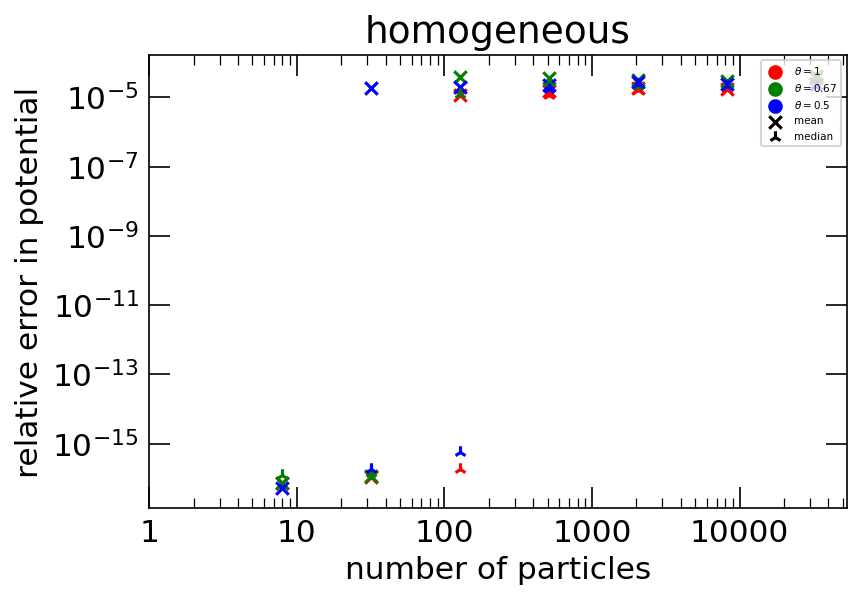

In [40]:
def plot_pretty(dpi=150,fontsize=15):
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in',top=True)
    plt.rc('ytick', direction='in',right=True)
    plt.rc('xtick.major', pad=5, size=10)
    plt.rc('xtick.minor', pad=5, size= 5)
    plt.rc('ytick.major', pad=5, size=10)
    plt.rc('ytick.minor', pad=5, size = 5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    plt.rc('legend',fontsize=5)
    plt.rcParams['figure.figsize'] = [6, 4]

plot_pretty()

for i in range(3):
    plt.scatter([0],[0],c=colors[i],label=r"$\theta = " + str(round(thetas[i],2)) + r"$")
plt.scatter([0],[0],c="black",label="mean",marker="x")
plt.scatter([0],[0],c="black",label="median",marker="2")
for idx,theta in enumerate(thetas):
    plt.scatter(ns,means[:,idx],c=colors[idx],marker="x")
for idx,theta in enumerate(thetas):
    plt.scatter(ns,medians[:,idx],c=colors[idx],marker="2")
plt.xscale('log')
plt.yscale('log')
#plt.yticks([.03,.01,.003,.001,.0003],[.03,.01,.003,.001,.0003])
plt.xticks([1,10,100,1000,10000],[1,10,100,1000,10000])
plt.title("homogeneous")
plt.xlabel("number of particles")
plt.ylabel("relative error in potential")
plt.legend(fontsize=5,loc="upper right")
#plt.savefig("Barnes Hut Plot.jpg")
plt.show()

$CDF(x)=\frac{\ln(\frac{R_s+r}{R_s})+\frac{R_s}{R_s+r}-1}{\ln(\frac{R_s+R_{vir}}{R_s})+\frac{R_s}{R_s+R_{vir}}-1}$

$r=-\frac{R_s}{W(-\frac{1}{e^{p(\ln(\frac{R_s+R_{vir}}{R_s})+\frac{R_s}{R_s+R_{vir}})}})}-R_s$